In [2]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
gorq_api_key = os.environ["GROQ_API_KEY"]

In [3]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("./data/be-good.txt")

loaded_data = loader.load()

In [4]:
loaded_data

[Document(metadata={'source': './data/be-good.txt'}, page_content='Be good\n \n\nApril 2008(This essay is\\n derived from a talk at the 2008 Startup School.)About a month after we started Y Combinator we came up with the\nphrase that became our motto: Make something people want.\\n  We\'ve\nlearned a lot since then, but if I were choosing now that\'s still\nthe one I\'d pick.Another thing we tell founders is not to worry too much about the\nbusiness model, at least at first.  Not because making money is\nunimportant, but because it\'s so much easier than building something\ngreat.A couple weeks ago I realized that if you put those two ideas\ntogether, you get something surprising.  Make something people want.\nDon\'t worry too much about making money.  What you\'ve got is a\ndescription of a charity.When you get an unexpected result like this, it could either be a\nbug or a new discovery.  Either businesses aren\'t supposed to be\nlike charities, and we\'ve proven by reductio ad absurd

In [5]:
loaded_data[0].page_content

'Be good\n \n\nApril 2008(This essay is\\n derived from a talk at the 2008 Startup School.)About a month after we started Y Combinator we came up with the\nphrase that became our motto: Make something people want.\\n  We\'ve\nlearned a lot since then, but if I were choosing now that\'s still\nthe one I\'d pick.Another thing we tell founders is not to worry too much about the\nbusiness model, at least at first.  Not because making money is\nunimportant, but because it\'s so much easier than building something\ngreat.A couple weeks ago I realized that if you put those two ideas\ntogether, you get something surprising.  Make something people want.\nDon\'t worry too much about making money.  What you\'ve got is a\ndescription of a charity.When you get an unexpected result like this, it could either be a\nbug or a new discovery.  Either businesses aren\'t supposed to be\nlike charities, and we\'ve proven by reductio ad absurdum that one\nor both of the principles we began with is false.  Or

# CharacterTextSplitter

In [6]:
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator="\n\n",
    chunk_size=1000,
    chunk_overlap=100,
    length_function=len,
    is_separator_regex=False,
)

### Explaination avobe text_splitter object: 

CharacterTextSplitter = সহজভাবে টেক্সট কাটার টুল।

separator = কোথায় কাটবে।

chunk_size = প্রতিটি টুকরার সাইজ।

chunk_overlap = এক chunk থেকে পরের chunk-এ কতটুকু পুনরাবৃত্তি থাকবে।

length_function = লেন্থ মাপার ফাংশন।

is_separator_regex = separator কে regex ধরে নাকি সাধারণ টেক্সট ধরে, সেটা নির্ধারণ করে।

Separator tries first, but chunk_size override করে যদি paragraph বড় হয়।

Splitter smartly দুইটা rule (separator + chunk_size) একসাথে handle করে।

In [7]:
texts = text_splitter.create_documents([loaded_data[0].page_content])
#texts = text_splitter.create_documents([doc.page_content for doc in loaded_data])


In [88]:
texts

[Document(metadata={}, page_content='Be good'),
 Document(metadata={}, page_content='April 2008(This essay is derived from a talk at the 2008 Startup School.)About a month after we started Y Combinator we came up with the\nphrase that became our motto: Make something people want.  We\'ve\nlearned a lot since then, but if I were choosing now that\'s still\nthe one I\'d pick.Another thing we tell founders is not to worry too much about the\nbusiness model, at least at first.  Not because making money is\nunimportant, but because it\'s so much easier than building something\ngreat.A couple weeks ago I realized that if you put those two ideas\ntogether, you get something surprising.  Make something people want.\nDon\'t worry too much about making money.  What you\'ve got is a\ndescription of a charity.When you get an unexpected result like this, it could either be a\nbug or a new discovery.  Either businesses aren\'t supposed to be\nlike charities, and we\'ve proven by reductio ad absurdum

In [8]:
len(texts)

2

In [9]:
texts[0]

Document(metadata={}, page_content='Be good')

In [10]:
texts[1]

Document(metadata={}, page_content='April 2008(This essay is\\n derived from a talk at the 2008 Startup School.)About a month after we started Y Combinator we came up with the\nphrase that became our motto: Make something people want.\\n  We\'ve\nlearned a lot since then, but if I were choosing now that\'s still\nthe one I\'d pick.Another thing we tell founders is not to worry too much about the\nbusiness model, at least at first.  Not because making money is\nunimportant, but because it\'s so much easier than building something\ngreat.A couple weeks ago I realized that if you put those two ideas\ntogether, you get something surprising.  Make something people want.\nDon\'t worry too much about making money.  What you\'ve got is a\ndescription of a charity.When you get an unexpected result like this, it could either be a\nbug or a new discovery.  Either businesses aren\'t supposed to be\nlike charities, and we\'ve proven by reductio ad absurdum that one\nor both of the principles we beg

# RecursiveCharacterTextSplitter

In [11]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

recursive_splitter = RecursiveCharacterTextSplitter(
    chunk_size=26,
    chunk_overlap=4
)

text = recursive_splitter.split_text(loaded_data[0].page_content)

In [12]:
text

['Be good',
 'April 2008(This essay',
 'is\\n derived from a talk',
 'at the 2008 Startup',
 'School.)About a month',
 'after we started Y',
 'Y Combinator we came up',
 'up with the',
 'phrase that became our',
 'our motto: Make something',
 "people want.\\n  We've",
 'learned a lot since then,',
 'but if I were choosing',
 "now that's still",
 "the one I'd pick.Another",
 'thing we tell founders is',
 'is not to worry too much',
 'about the',
 'business model, at least',
 'at first.  Not because',
 'making money is',
 'unimportant, but because',
 "it's so much easier than",
 'building something',
 'great.A couple weeks ago',
 'ago I realized that if',
 'if you put those two',
 'two ideas',
 'together, you get',
 'get something surprising.',
 'Make something people',
 'want.',
 "Don't worry too much",
 'about making money.  What',
 "you've got is a",
 'description of a',
 'a charity.When you get an',
 'an unexpected result like',
 'this, it could either be',
 'be a',
 'bug or a new di

# Embeddings
* Transform the small parts of text in numbers (vectors) that are easily stored and searched by vector databases.

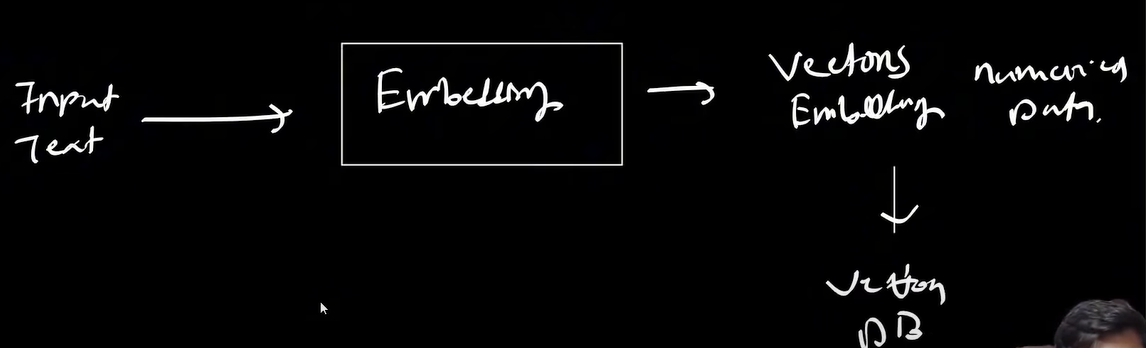

In [32]:
#from langchain_openai import OpenAIEmbeddings

# embeddings_model = OpenAIEmbeddings()# 

from langchain_huggingface import HuggingFaceEmbeddings

embeddings_model = HuggingFaceEmbeddings(
    model_name="all-MiniLM-L6-v2"
)

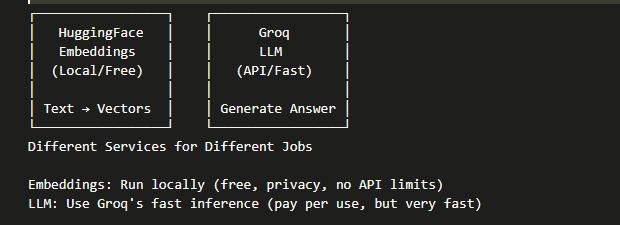

In [41]:
chunks_of_text =     [
        "Hi there!",
        "Hello!",
        "What's your name?",
        "Bond, James Bond",
        "Hello Bond!"
    ]

In [ ]:
embeddings = embeddings_model.embed_documents(chunks_of_text)


In [40]:
embeddings

[[-0.09151118993759155,
  0.025147823616862297,
  0.002047148533165455,
  0.005181029438972473,
  -0.015277055092155933,
  -0.052715789526700974,
  0.016557469964027405,
  0.04239160567522049,
  -0.029215682297945023,
  0.006825136952102184,
  -0.027684316039085388,
  0.007252806797623634,
  -0.010559403337538242,
  -0.04191433638334274,
  0.03230910003185272,
  0.03700307011604309,
  -0.05315244942903519,
  -0.009931979700922966,
  -0.10471195727586746,
  -0.03906850144267082,
  0.03552791476249695,
  0.07590001821517944,
  -0.10407807677984238,
  0.04460621997714043,
  -0.026902098208665848,
  -0.03198998421430588,
  -0.006866851355880499,
  0.064168781042099,
  -0.07118319720029831,
  -0.01758386380970478,
  0.012554174289107323,
  0.12845943868160248,
  -0.02276206575334072,
  0.05372180417180061,
  0.02916974574327469,
  0.0488780252635479,
  -0.0469440221786499,
  -0.07912519574165344,
  0.04516483098268509,
  0.02378946542739868,
  -0.011888730339705944,
  0.01180628128349781,
 

In [43]:
len(embeddings[0])

384

In [44]:
print(embeddings[0][:5])

[-0.09151118993759155, 0.025147823616862297, 0.002047148533165455, 0.005181029438972473, -0.015277055092155933]


# Vector Stores (aka. Vector Databases)
* Store embeddings in a very fast searchable database.

In [61]:
from langchain_community.document_loaders import TextLoader
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma

# Load the document, split it into chunks, embed each chunk and load it into the vector store.
loaded_document = TextLoader('./data/be-good.txt').load()

text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)

chunks_of_text = text_splitter.split_documents(loaded_document)



In [62]:
len(chunks_of_text)

2

Creating vector db with Chromadb

In [63]:
#vector_db = Chroma.from_documents(chunks_of_text, OpenAIEmbeddings())
vector_db = Chroma.from_documents(chunks_of_text, HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2"))

In [66]:
vector_db

similarity serach based on vector database

In [67]:
question = "What did the president say about the John Lewis Voting Rights Act?"

response = vector_db.similarity_search(question)

print(response[0].page_content)

April 2008(This essay is\n derived from a talk at the 2008 Startup School.)About a month after we started Y Combinator we came up with the
phrase that became our motto: Make something people want.\n  We've
learned a lot since then, but if I were choosing now that's still
the one I'd pick.Another thing we tell founders is not to worry too much about the
business model, at least at first.  Not because making money is
unimportant, but because it's so much easier than building something
great.A couple weeks ago I realized that if you put those two ideas
together, you get something surprising.  Make something people want.
Don't worry too much about making money.  What you've got is a
description of a charity.When you get an unexpected result like this, it could either be a
bug or a new discovery.  Either businesses aren't supposed to be
like charities, and we've proven by reductio ad absurdum that one
or both of the principles we began with is false.  Or we have a new
idea.I suspect it's th

# Vector Store as Retriever
* Find the embedding that best answers your question.

In [86]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("./data/be-good.txt")

In [87]:
from langchain_community.vectorstores import FAISS
#from langchain_openai import OpenAIEmbeddings
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_text_splitters import CharacterTextSplitter

loaded_document = loader.load()

text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)

chunks_of_text = text_splitter.split_documents(loaded_document)

embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

vector_db = FAISS.from_documents(chunks_of_text, embeddings)

In [88]:
vector_db

In [92]:
retriever = vector_db.as_retriever(search_kwargs={"k": 2})

In [93]:
response = retriever.invoke("what is the last name of Shakil?")
response

[Document(id='220a97b3-98da-4fc1-9bf7-a01f406dc1a7', metadata={'source': './data/be-good.txt'}, page_content='Be good'),
 Document(id='14acccff-4266-4ec6-a9cb-645e67671d07', metadata={'source': './data/be-good.txt'}, page_content='April 2008(This essay is\\n derived from a talk at the 2008 Startup School.)About a month after we started Y Combinator we came up with the\nphrase that became our motto: Make something people want.\\n  We\'ve\nlearned a lot since then, but if I were choosing now that\'s still\nthe one I\'d pick.Another thing we tell founders is not to worry too much about the\nbusiness model, at least at first.  Not because making money is\nunimportant, but because it\'s so much easier than building something\ngreat.A couple weeks ago I realized that if you put those two ideas\ntogether, you get something surprising.  Make something people want.\nDon\'t worry too much about making money.  What you\'ve got is a\ndescription of a charity.When you get an unexpected result like 

In [94]:
len(response)

2